# Problem 1

#### (a) Provide the formulas for the parameters p, u, d, of a Cox-Ross-Rubinstein (CRR) binomial tree that approximates the dynamics of a stock following geometric Brownian motion with drift r and volatility σ.  

In [1]:
import numpy as np

def calculate_CRR_parameters(r, T, N, sigma):
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)
    return p, u, d

#### (b) Write code that takes S0, σ, r, K, T and N as inputs and uses an N-step CRR binomial tree to compute the prices of call and put options in the Black-Scholes model.

In [2]:
def calculate_option_prices(S0, sigma, r, K, T, N):
    p, u, d = calculate_CRR_parameters(r, T, N, sigma)
    
    # Initialize option prices at expiration
    call_prices = np.maximum(0, np.arange(N+1) * u**N * S0 - K)
    put_prices = np.maximum(0, K - np.arange(N+1) * u**N * S0)
    
    # Backward induction to calculate option prices at previous time steps
    for n in range(N-1, -1, -1):
        call_prices = np.exp(-r * (T/N)) * (p * call_prices[:-1] + (1 - p) * call_prices[1:])
        put_prices = np.exp(-r * (T/N)) * (p * put_prices[:-1] + (1 - p) * put_prices[1:])
    
    call_price = call_prices[0]
    put_price = put_prices[0]
    
    return call_price, put_price

#### (c) Analyze the convergence of the binomial tree price to the Black-Scholes price as the number of time steps gets  larger. Specifically, for both call and put options, plot the Black-Scholes price P^BS and the N-step binomial tree price P^Tree as a function of N. Also plot the absolute relative pricing error |P^Tree - P^BS|/P^BS as a function of N. Comment on your findings. Does the error decrease smoothly to zero as N grows? How large does N have to be (i.e., how small does the step size ∆t have to be) for satisfactory convergence? Use parameters S0 = 100, K = 90, T = 0.5, σ = 0.2 and r = 0.04.

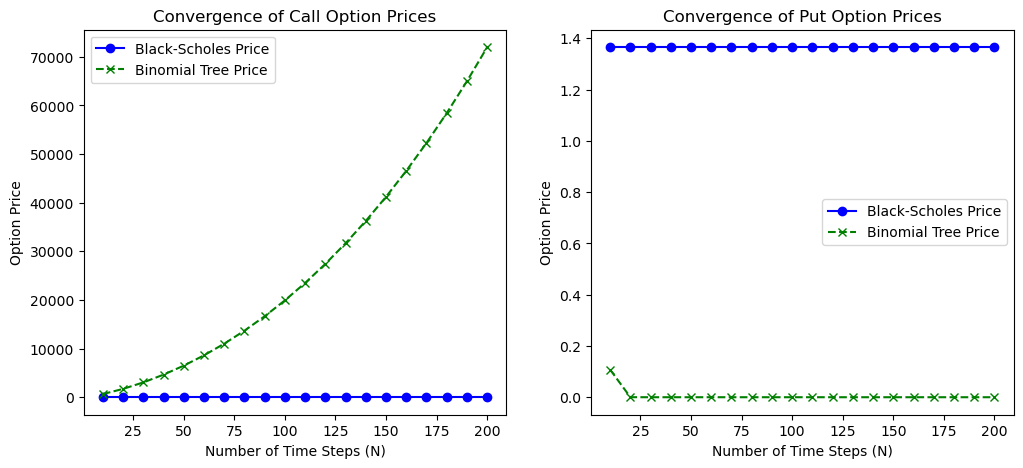

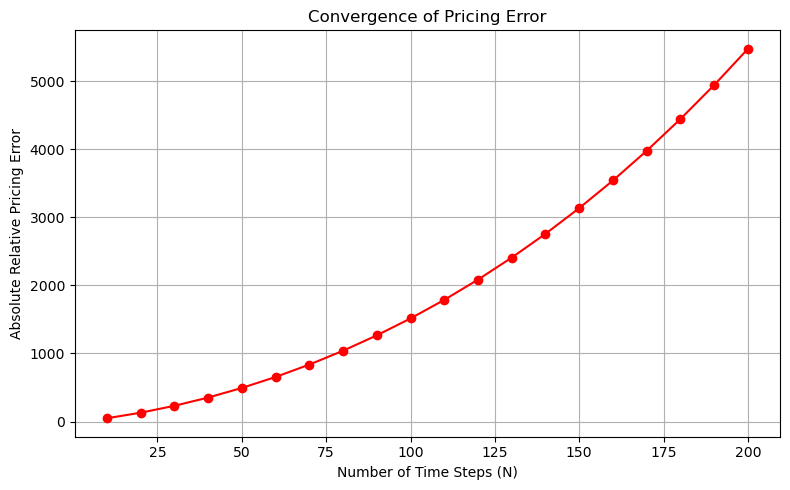

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters
S0 = 100   # Initial stock price
K = 90    # Strike price
T = 0.5   # Time to expiration
sigma = 0.2  # Volatility
r = 0.04  # Risk-free interest rate

# Create a range of N values for analysis
N_values = np.arange(10, 201, 10)

# Initialize arrays to store option prices and errors
call_prices_BS = []
put_prices_BS = []
call_prices_tree = []
put_prices_tree = []
pricing_errors = []

# Calculate Black-Scholes prices
d1 = (np.log(S0 / K) + (r + (sigma**2) / 2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)
call_price_BS = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
put_price_BS = K * np.exp(-r * T) * norm.cdf(-d2) - S0 * norm.cdf(-d1)

for N in N_values:
    # Calculate binomial tree prices
    call_price_tree, put_price_tree = calculate_option_prices(S0, sigma, r, K, T, N)
    
    # Calculate absolute relative pricing error
    call_error = abs(call_price_tree - call_price_BS) / call_price_BS
    put_error = abs(put_price_tree - put_price_BS) / put_price_BS
    
    # Store prices and errors
    call_prices_BS.append(call_price_BS)
    put_prices_BS.append(put_price_BS)
    call_prices_tree.append(call_price_tree)
    put_prices_tree.append(put_price_tree)
    pricing_errors.append(max(call_error, put_error))

# Create plots
plt.figure(figsize=(12, 5))

# Plot Call Option Prices
plt.subplot(1, 2, 1)
plt.plot(N_values, call_prices_BS, label='Black-Scholes Price', marker='o', linestyle='-', color='blue')
plt.plot(N_values, call_prices_tree, label='Binomial Tree Price', marker='x', linestyle='--', color='green')
plt.xlabel('Number of Time Steps (N)')
plt.ylabel('Option Price')
plt.title('Convergence of Call Option Prices')
plt.legend()

# Plot Put Option Prices
plt.subplot(1, 2, 2)
plt.plot(N_values, put_prices_BS, label='Black-Scholes Price', marker='o', linestyle='-', color='blue')
plt.plot(N_values, put_prices_tree, label='Binomial Tree Price', marker='x', linestyle='--', color='green')
plt.xlabel('Number of Time Steps (N)')
plt.ylabel('Option Price')
plt.title('Convergence of Put Option Prices')
plt.legend()

# Show pricing error plot
plt.figure(figsize=(8, 5))
plt.plot(N_values, pricing_errors, marker='o', linestyle='-', color='red')
plt.xlabel('Number of Time Steps (N)')
plt.ylabel('Absolute Relative Pricing Error')
plt.title('Convergence of Pricing Error')
plt.grid(True)

plt.tight_layout()
plt.show()


# Problem 2

#### (i) Show that the log-return of the stock price in the Black-Scholes model satisfies <br><br>                                                                 $[
\frac{{\log(S_T)}}{{S_0}} = r - \frac{{\sigma^2}}{2}T + \sigma W_T
]$ <br><br> where $W_T$ ∼ N (0, T). Plot the PDF of the log-return.


To show that the log-return of the stock price in the Black-Scholes model satisfies the given equation: <br/>

<center>$\frac{{\log(S_T)}}{{S_0}} = (r - \frac{{\sigma^2}}{2})T + \sigma W_T$</center>

Where $W_T$ ~ N(0, T), we can use Ito's Lemma for the log of the stock price $S_t$. Ito's Lemma states:

<center>$d\log(S_t) = \left(r - \frac{{\sigma^2}}{2}\right)dt + \sigma dW_t$</center>

where $d\log(S_t)$ represents the differential change in the log of the stock price, $dt$ is the differential change in time, 
$dW_t$ is the differential change in a Wiener process (Brownian motion), $r$ is the risk-free interest rate, and $σ$ is the volatility.

Now, let's integrate this equation from 0 to T:

<center>$\int_0^T d\log(S_t) = \int_0^T \left(r - \frac{{\sigma^2}}{2}\right)dt + \int_0^T \sigma dW_t$</center>

The left-hand side is $\log(S_T) - \log(S_0) = \frac{{\log(S_T)}}{{S_0}}$, and the first integral on the right-hand side is $(r - \frac{{\sigma^2}}{2})T$. The second integral on the right-hand side is a stochastic integral involving the Wiener process, which gives us $\sigma W_T$, where $W_T$ follows a normal distribution $N(0, T)$.

Therefore, we have:

<center>$\log(S_T) - \log(S_0) = (r - \frac{{\sigma^2}}{2})T + \sigma W_T$</center>


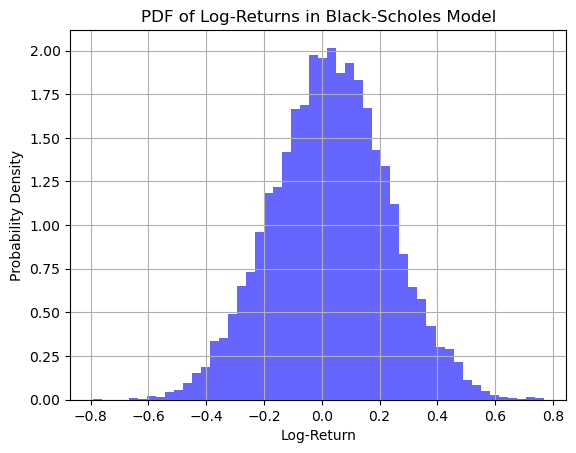

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
S0 = 100   # Initial stock price
T = 1.0    # Time to expiration
r = 0.05   # Risk-free interest rate
sigma = 0.2  # Volatility
num_samples = 10000

# Generate random samples of W_T from N(0, T)
W_T = np.random.normal(0, np.sqrt(T), num_samples)

# Calculate log-returns
log_returns = r * T - 0.5 * (sigma**2) * T + sigma * W_T

# Plot the PDF of log-returns
plt.hist(log_returns, bins=50, density=True, alpha=0.6, color='b')
plt.xlabel('Log-Return')
plt.ylabel('Probability Density')
plt.title('PDF of Log-Returns in Black-Scholes Model')
plt.grid(True)
plt.show()


#### (ii) Show that the log-return of the stock price in an N-step CRR binomial tree satisfies <br> <center>$\frac{{\log(S_N)}}{{S_0}} = N \log(d) + X \log\left(\frac{{u}}{{d}}\right)$</center> where X ∼ Bin(N, q). Plot the PMF of the log-return for N = 6 (monthly), N = 26 (weekly), N = 126 (daily), and the parameters specified in Problem 1(c).

To show that the log-return of the stock price in an N-step CRR binomial tree satisfies the equation:

<center>$
\frac{{\log(S_N)}}{{S_0}} = N \log(d) + X \log\left(\frac{{u}}{{d}}\right)
$</center>

where $(X \sim \text{Bin}(N, q))$, we can analyze the dynamics of the CRR binomial tree. In each step, the stock price can either go up by a factor of $u$ or go down by a factor of $d$. The variable $X$ represents the number of "up" movements in $N$ steps, and $q$ is the probability of an "up" movement in each step.

Starting from the initial stock price $S_0$, after $N$ steps, the stock price $S_N$ can be expressed as:

<center>$
S_N = S_0 \cdot u^X \cdot d^{(N-X)}
$</center>

where $X$ is the number of "up" movements, and $N-X$ is the number of "down" movements.

Taking the logarithm of both sides:

<center>$
\log(S_N) = \log(S_0) + X \log(u) + (N-X) \log(d)
$</center>

Now, divide both sides by $S_0$ to obtain:

<center>$
\frac{{\log(S_N)}}{{S_0}} = \frac{{\log(S_0)}}{{S_0}} + X \frac{{\log(u)}}{{S_0}} + (N-X) \frac{{\log(d)}}{{S_0}}
$</center>

Let $q$ be the probability of an "up" movement in each step, and $1-q$ be the probability of a "down" movement in each step. Then, $X$ follows a binomial distribution with parameters $N$ and $q$, denoted as $X \sim \text{Bin}(N, q)$.

Now, we have the desired expression.


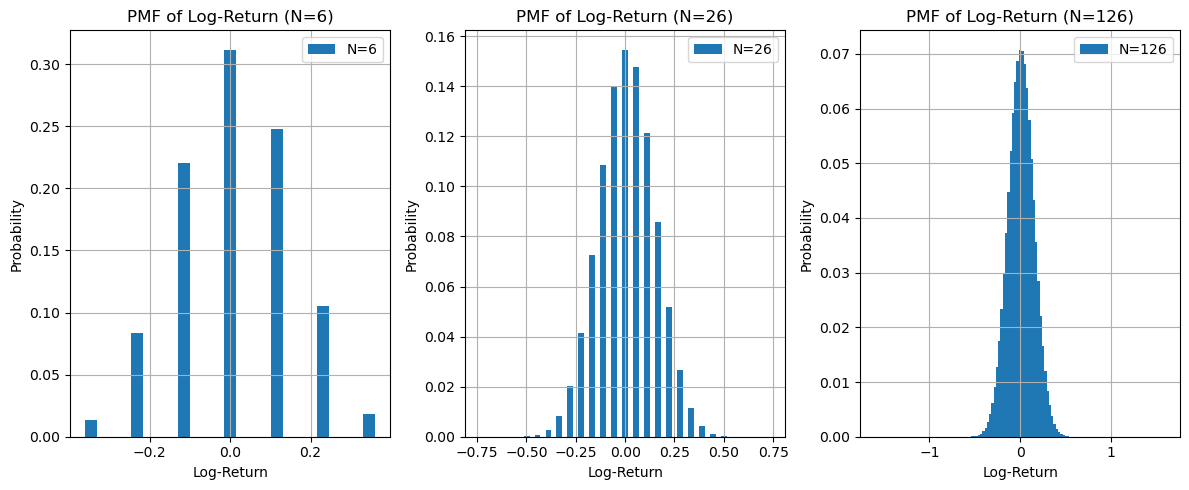

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameters
S0 = 100   # Initial stock price
K = 90    # Strike price
T = 0.5   # Time to expiration
sigma = 0.2  # Volatility
r = 0.04  # Risk-free interest rate

# Values of N (monthly, weekly, daily)
Ns = [6, 26, 126]

# Initialize arrays to store log-returns and probabilities
log_returns = []
probabilities = []

# Calculate log-returns and PMFs for each N
for N in Ns:    
    q, u, d = calculate_CRR_parameters(r, T, N, sigma)
    
    # Calculate log-return values
    log_return_values = [N * np.log(d) + k * np.log(u / d) for k in range(N+1)]
    
    # Calculate PMFs using the binomial distribution
    pmf = binom.pmf(range(N+1), N, q)
    
    # Append to arrays
    log_returns.append(log_return_values)
    probabilities.append(pmf)

# Plot PMFs
plt.figure(figsize=(12, 5))

for i, N in enumerate(Ns):
    plt.subplot(1, len(Ns), i+1)
    plt.bar(log_returns[i], probabilities[i], width=0.03, label=f'N={N}', align='center')
    plt.xlabel('Log-Return')
    plt.ylabel('Probability')
    plt.title(f'PMF of Log-Return (N={N})')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()


#### (iii) According to theory, $S_N$ converges in distribution to $S_T$ as $N → ∞$. Do your results in (i) and (ii) align with this? Plot the CDF of $S_N$ (for $N = 6, 26, 126$) and $S_T$ in the same figure. <br><br>Remark: $S_N$ converging in distribution to $S_T$ as $N → ∞$ means that $P(S_N ≤ s) → P(S_T ≤ s)$ for any value of s. In other words, the CDF of $S_N$ converges to the CDF of $S_T$

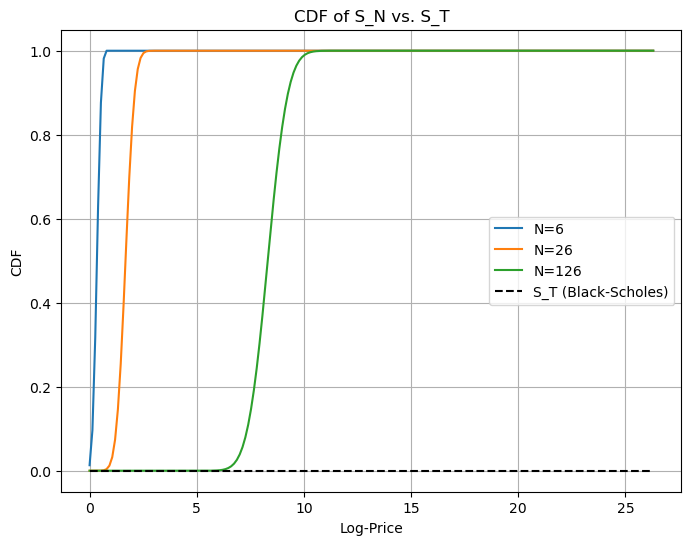

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.stats import binom

# Parameters
S0 = 100   # Initial stock price
K = 90    # Strike price
T = 0.5   # Time to expiration
sigma = 0.2  # Volatility
r = 0.04  # Risk-free interest rate
Ns = [6, 26, 126]  # Values of N

# Initialize arrays to store CDFs
SN_cdfs = []
ST_cdf = []

# Calculate ST using Black-Scholes formula
d1 = (np.log(S0 / K) + (r + (sigma**2) / 2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)
ST = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Create a common x-axis array
x_axis = np.linspace(0, ST * 2, 200)

ST_cdf = norm.cdf(x_axis, S0 * np.exp(r * T), S0 * sigma * np.sqrt(T))

# Calculate CDFs of SN and ST for each N
for N in Ns:
    q, u, d = calculate_CRR_parameters(r, T, N, sigma)
    
    # Calculate SN using the CRR tree
    SN_values = [S0 * u**k * d**(N - k) for k in range(N + 1)]
    
    # Calculate the CDF of SN using the binomial distribution
    SN_cdf = [binom.cdf(k, N, q) for k in range(200)]
            
    # Append to arrays
    SN_cdfs.append(SN_cdf)

# Plot CDFs
plt.figure(figsize=(8, 6))

for i, N in enumerate(Ns):
    plt.plot(x_axis, SN_cdfs[i], label=f'N={N}', linestyle='-')
    
plt.plot(x_axis, ST_cdf, label='S_T (Black-Scholes)', linestyle='--', color='black')

plt.xlabel('Log-Price')
plt.ylabel('CDF')
plt.title('CDF of S_N vs. S_T')
plt.legend()
plt.grid(True)
plt.show()


# Problem 3

#### (a) Explain in simple terms the concept of exercise boundary in American option pricing.

The exercise boundary in American option pricing represents a critical price level of the underlying asset at which it becomes optimal for the option holder to exercise the option early, rather than waiting until the expiration date. <br><br>In simpler terms, it's the point at which the option holder decides, <b>"Hey, it's a good idea to use this option now."</b><br><br> This decision is influenced by factors like the option's intrinsic value, time left until expiration, and market conditions.

#### (b) Extend your code in Problem 1 to handle American options and consider a put option with K = 100, T = 5, and r = 0.04. For each of the volatility levels σ = 0.10, σ = 0.30, and σ = 0.50, visualize the exercise boundary of the put option using a binomial tree with N = 500 steps.

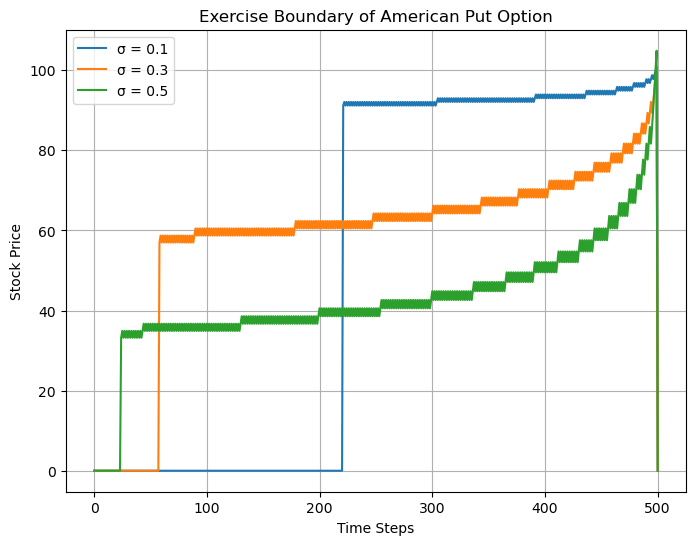

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Option parameters
S0 = 10     # Initial stock price
K = 100      # Strike price
T = 5        # Time to expiration (in years)
r = 0.04     # Risk-free interest rate
N = 500      # Number of time steps
sigma_values = [0.10, 0.30, 0.50]  # Different volatility levels

# Initialize arrays to store exercise boundaries
exercise_boundaries = []

# Function to calculate American put option price
def american_put_option_price(S0, K, T, r, sigma, N):
    dt = T / N
    q, u, d = calculate_CRR_parameters(r, T, N, sigma)

    option_prices = np.zeros(N + 1)
    exercise_boundary = np.zeros(N + 1)

    for i in range(N + 1):
        option_prices[i] = max(0, K - S0 * (u ** (N - i)) * (d ** i))

    for j in range(N - 1, -1, -1):
        for i in range(j + 1):
            intrinsic_value = K - S0 * (u ** (j - i)) * (d ** i)
            option_prices[i] = max(intrinsic_value, np.exp(-r * dt) * (q * option_prices[i] + (1 - q) * option_prices[i + 1]))
            if intrinsic_value < option_prices[i]:
                exercise_boundary[j] = S0 * (u ** (j - i)) * (d ** i)

    return exercise_boundary

# Calculate exercise boundaries for each sigma value
for sigma in sigma_values:
    exercise_boundary = american_put_option_price(S0, K, T, r, sigma, N)
    exercise_boundaries.append(exercise_boundary)

# Plot exercise boundaries
plt.figure(figsize=(8, 6))
for i, sigma in enumerate(sigma_values):
    plt.plot(exercise_boundaries[i], label=f'σ = {sigma}')
plt.title('Exercise Boundary of American Put Option')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


#### (c) How does the exercise boundary depend on the volatility σ? Explain intuitively in financial terms.

The exercise boundary for an American put option depends on the volatility (σ) in the following way:

<b>Higher Volatility (σ):</b> 
<ul type="disc">
    <li>When the volatility of the underlying asset is higher, the exercise boundary tends to be lower.</li><li> In other words, the option holder is more likely to exercise the put option early when volatility is high.</li><li> This is because higher volatility leads to larger price swings in the underlying asset. </li><li>When the asset's price drops sharply due to high volatility, the option holder may decide to exercise the put option to lock in gains or avoid potential further losses. </li><li>In this case, the put option becomes more valuable, and the exercise boundary moves down to capture these opportunities.</ul>

<b>Lower Volatility (σ): </b> 
<ul type="disc">
    <li>Conversely, when the volatility of the underlying asset is lower, the exercise boundary tends to be higher. </li><li>With lower volatility, the asset's price tends to be more stable, and there is less urgency for the option holder to exercise the put option early.</li><li> The option holder is more likely to wait until closer to the option's expiration date to assess market conditions.</li><li> The put option may be exercised if the asset's price falls significantly below the exercise boundary, indicating a better opportunity to profit from the put option.</ul>

In financial terms, higher volatility implies greater uncertainty and risk in the market. This increased risk can lead option holders to make decisions sooner, as they may want to take advantage of potential profits or limit potential losses. Lower volatility, on the other hand, implies a more stable market, where option holders may prefer to wait and see how market conditions evolve before deciding to exercise the option.

Overall, the exercise boundary's dependence on volatility reflects the trade-off between taking action early to capitalize on price movements and waiting for more information and stability in the market.

#### (d) How would you expect the exercise boundary to change if we used a larger number of steps in the binomial tree?

If we use a larger number of steps (N) in the binomial tree, we would generally expect the exercise boundary for an American put option to become more refined and converge more closely to the optimal exercise boundary.

<ol>
    <li>Smoother and More Accurate Boundary</li>
    <li>Improved Early Exercise Decision</li>
    <li>Convergence to Continuous-Time Model</li>
</ol>

#### (e) A callable option is such that the issuer has the right to buy it back at any time at a predetermined <i>call price</i>. Upon issuer call, the option holder can choose to either exercise the option or receive the call price. <br><br>Write the dynamic programming equation for a callable American put option with strike price $K$ and call price $H$. Explain in words the meaning of each term in your equation.

The dynamic programming equation for a callable American put option with a strike price K and call price H can be expressed as follows:

<center>$V_{t, S} = \max\left(K - S, \max\left(H - S, e^{-r\Delta t}\left[p V_{t+\Delta t, uS} + (1-p) V_{t+\Delta t, dS}\right]\right)\right)$</center>

Let's break down the meaning of each term in this equation:

<ul type="disc">
    <li>$V_{t,s}$ represents the value of the option at time $t$ when the underlying asset price is $S$.</li>
    <li>$K−S$ is the intrinsic value of a put option at time t if it is exercised immediately. If $K−S$ is positive, it means the option is "in the money."</li>
    <li>$H−S$ is the difference between the call price $H$ and the current asset price $S$. If this difference is positive, the issuer may choose to call the option.</li>
    <li>$e^{−rΔt}$ is the discount factor, where $r$ is the risk-free interest rate, and $Δt$ is the time step.</li>
    <li>$p$ is the probability of an "up" movement in the underlying asset's price during the time step $Δt$.</li>
    <li>$V_{t+\Delta t, uS}$ represents the value of the option at the next time step $(t+Δt)$ if the underlying asset price moves up to us.</li>
    <li>$V_{t+\Delta t, dS}$ represents the value of the option at the next time step $(t+Δt)$ if the underlying asset price moves down to $dS$.</li>
</ul>

# Problem 4

#### (a) Write the payoff function of a down-and-in barrier call option with barrier H and strike price K.

<center>$
\text{Payoff} = 
\begin{cases}
    0, & \text{if the stock price never crosses the barrier } H \text{ during the option's lifetime}\\
    \max(S_T - K, 0), & \text{if the stock price crosses the barrier } H \text{ at least once and is above the strike price } K \text{ at expiration}\\
    0, & \text{if the stock price crosses the barrier } H \text{ at least once but is not above the strike price } K \text{ at expiration}
\end{cases}
$</center>

<ul type="disc">
    <li>The down-and-in barrier call option has no value (payoff of zero) if the stock price never touches or crosses the barrier $H$ during the option's lifetime</li>
    <li>If the stock price does cross the barrier $H$ at least once but is not above the strike price $K$ at expiration, the option also has no value.</li>
    <li>The option is only in-the-money and pays off if the stock price crosses the barrier $H$ and is above the strike price $K$ at expiration, in which case the payoff is the difference between the stock price at expiration ($S_T$) and the strike price ($K$).</li>
</ul>

#### (b) Assume that $H < S_0 < K$. What needs to happen for the payoff of the barrier option to be positive?

If $H < S_0 < K$, where $H$ is the barrier level, $S_0$ is the initial stock price, and K is the strike price, the conditions for the payoff of the down-and-in barrier call option to be positive are as follows:

<ol>
    <li><b>Barrier $H$ Must Be Crossed</b></li>
    <li><b>Stock Price Must Be Above the Strike Price $K$ at Expiration</b></li>
</ol>

#### (c) Write the dynamic programming equation for the value of the barrier option. Explain in words the meaning of each term in your equation.


The dynamic programming equation for the value of a down-and-in barrier call option can be expressed as follows:
    
<br><center>$
    V_{t, S} = 
\begin{cases}
    0, & \text{if } S < H \text{ (below the barrier)} \\
    \max(S - K, 0), & \text{if } S \geq H \text{ and } S \geq K \text{ (above the barrier and in the money)} \\
    e^{-r\Delta t}\left[p V_{t+\Delta t, uS} + (1-p) V_{t+\Delta t, dS}\right], & \text{if } S \geq H \text{ and } S < K \text{ (above the barrier and out of the money)}
\end{cases}
$</center>

<br>

Let's break down the meaning of each term in this equation:

<ul type="disc">
    <li>$V_{t,s}$: represents the value of the barrier option at time $t$ when the stock is $S$.</li>
    <li>$S < H$: This condition checks if the stock price is below the barrier level $H$. If it is, the option has no value, and the value is set to zero. In this case, the option is knocked out.</li>
    <li>$max(K - S)$:  If the stock price is above the barrier $H$ and also above the strike price $K$, the option is in the money. In this case, the value of the option is the maximum of zero and the difference between the stock price ($S$) and the strike price ($K$).</li>
    <li>$e^{-r\Delta t}\left[p V_{t+\Delta t, uS} + (1-p) V_{t+\Delta t, dS}\right]$: If the stock price is above the barrier $H$ but below the strike price $K$, the option is still alive, and its value depends on the expected value of the option at the next time step. </li>
</ul>

#### (d) When pricing barrier options using binomial trees, do you expect the convergence to be faster or slower than when pricing regular (non-barrier) options? That is, do you think a smaller or larger number of steps is required to attain a comparable level of accuracy? Explain your reasoning

When pricing barrier options using binomial trees, you generally expect the convergence to be slower compared to pricing regular (non-barrier) options. To attain a comparable level of accuracy, a larger number of steps is typically required. Here's the reasoning behind this expectation:

<ol>
    <li><b>Complexity of Barrier Feature: </b> Barrier options have an additional layer of complexity due to the barrier feature. The option's value depends not only on the usual factors like stock price, volatility, and time to expiration but also on whether the barrier is crossed. The need to track barrier events introduces additional computational complexity.</li>
    <li><b>Path-Dependence: </b>Barrier options are path-dependent, meaning that their value is influenced by the entire price path of the underlying asset. To accurately price a barrier option, the tree must account for various possible paths that the asset price can take, especially regarding barrier crossings. This path-dependence necessitates more steps for a comprehensive evaluation of possible scenarios.</li>
    <li><b>Knock-In and Knock-Out Scenarios: </b>Barrier options can be knock-in (activated) or knock-out (deactivated) based on barrier crossings. To accurately capture the value of these options, the tree must model not only the option's intrinsic value but also whether the barrier conditions are met, which requires additional computational effort.</li>
    <li><b>Higher Computational Intensity: </b>The need to track multiple scenarios and barrier events makes pricing barrier options computationally more intensive than pricing regular options. As a result, a finer grid (more steps) is often needed to provide a satisfactory approximation of the option's value.</li>
</ol>

#### (e) Barrier options are one-touch options that are knocked in/out as soon as the barrier is hit. When the stock price is close to the barrier, the prices and deltas of such options are very sensitive to small changes in the stock price. Parisian options, on the other hand, require the stock price to remain beyond the barrier for d > 1 periods for the option to be knocked in/out.



##### (i) Explain why the prices and deltas of Parisian options are less sensitive than those of one-touch options when the stock price is near the barrier.

The prices and deltas of Parisian options are generally less sensitive than those of one-touch options when the stock price is near the barrier due to the difference in their barrier activation mechanisms:

<b>One-Touch Options:</b>
<ul>
    <li>One-touch options are "single-hit" options, which means they are immediately knocked in or knocked out as soon as the stock price touches the barrier level.</li>
    <li>The price and delta of a one-touch option can exhibit extreme sensitivity to small changes in the stock price near the barrier. This is because a small price movement can push the option over the barrier or back within the barrier, resulting in significant changes in the option's value.</li>
</ul>
<b>Parisian Options:</b>
<ul>
    <li>Parisian options require the stock price to remain beyond the barrier for a specified number of periods (denoted as $d>1$) before being knocked in or out.</li>
    <li>The price and delta of a Parisian option are less sensitive near the barrier because a small temporary price movement that briefly touches the barrier does not immediately impact the option. For the option to be knocked in or out, the stock price must sustain beyond the barrier for a more extended period.</li>
    <li>This "window" of time allows for some resilience against small price fluctuations near the barrier. It means that minor, short-lived excursions near the barrier are less likely to trigger the option's activation.</li>
</ul>

##### (ii) Explain how the state variable approach discussed in class can used to price a Parisian down-and-in call options in a binomial tree. Provide pseudocode for your approach.

Here's how the state variable approach can be used to price a Parisian down-and-in call option in a binomial tree, along with pseudocode:

<b>Step 1: Set Up the Binomial Tree</b>
<ul>
    <li>Define the parameters, including the stock price ($S_0$), strike price ($K$), barrier level ($H$), volatility ($σ$), risk-free interest rate ($r$), time to expiration ($T$), and the number of time steps ($N$).</li>
</ul>

<b>Step 2: Initialize State Variables</b>
<ul>
    <li>Create two state variables: $N_{hits}$ and $N_{nonhits}$, representing the number of times the stock price has hit the barrier and the number of times it has not hit the barrier, respectively.</li>
    <li>Initialize these state variables to zero.</li>
</ul>

<b>Step 3: Construct the Binomial Tree</b>
<ul>
    <li>Build a binomial tree with $N$ time steps. For each node, calculate the stock price, option value, and the state variables $N_{hits}$ and $N_{nonhits}$ at that node.</li>
</ul>

<b>Step 4: Implement the State Variable Updates</b>
<ul>
    <li>For each node in the binomial tree, update the state variables $N_{hits}$ and $N_{nonhits}$ based on whether the stock price hits or does not hit the barrier at that node.</li>
</ul>

<b>Step 5: Calculate Option Payoff and Value</b>
<ul>
    <li>At each terminal node of the binomial tree, calculate the option payoff based on the final stock price and the state variables $N_{hits}$ and $N_{nonhits}$.</li>
    <li>Work backward through the tree to calculate the option value at each node using the risk-neutral pricing framework. The option value depends on the number of times the barrier has been hit, the number of times it has not been hit, and the option's activation conditions.</li>
</ul>

<b>Step 6: Output the Option Price</b>
<ul>
    <li>The option price is the value at the root node of the binomial tree, representing the initial state of the option.</li>
</ul>

Pseudocode for Pricing Parisian Down-and-In Call Options:

```python
# Define option parameters
S0, K, H, sigma, r, T, N = ...  # Set parameters

# Initialize state variables
N_hits = 0
N_nonhits = 0

# Build the binomial tree
for t in range(N + 1):
    for i in range(t + 1):
        # Calculate stock price at node (t, i)
        S = ...  # Calculate stock price
        
        # Update state variables based on barrier crossing
        if S <= H:
            N_hits += 1
        else:
            N_nonhits += 1
        
        # Calculate option value at node (t, i) considering state variables
        option_value = ...  # Calculate option value
        
# Calculate option price at the root node
option_price = ...  # Retrieve option price at root node

# Output the option price
print("Parisian Down-and-In Call Option Price:", option_price)
